# Homework 1
 
This homework will explore some basic techniques presented in the first two weeks of the course.
 
You will be invited to experiment with:
 
 1. Word Frequencies and Generation
 2. Co-occurrences
 2. Zipf's law
 2. Naive Bayes classifier
 
 
Fill in the blanks with your own code and see how it works.
 
# 1. Word Frequencies

In [2]:
import nltk
from nltk.corpus import brown

Get the list of words of documents in the category `news`.

In [3]:
nltk.download('brown')
brown_news = brown.words(categories='news')
print(len(brown_news))

100554


[nltk_data] Downloading package brown to /Users/lilf4p/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Compute the frequencies for all words

In [4]:
# this should be a dictionary with frequency counts for each word
news_freq = dict(nltk.FreqDist(word.lower() for word in brown_news if word.isalpha()))
news_freq

{'the': 6386,
 'fulton': 14,
 'county': 61,
 'grand': 19,
 'jury': 46,
 'said': 406,
 'friday': 41,
 'an': 311,
 'investigation': 11,
 'of': 2861,
 'recent': 20,
 'primary': 17,
 'election': 41,
 'produced': 6,
 'no': 120,
 'evidence': 17,
 'that': 829,
 'any': 94,
 'irregularities': 3,
 'took': 47,
 'place': 33,
 'further': 18,
 'in': 2020,
 'presentments': 1,
 'city': 93,
 'executive': 18,
 'committee': 75,
 'which': 245,
 'had': 281,
 'charge': 18,
 'deserves': 3,
 'praise': 2,
 'and': 2186,
 'thanks': 6,
 'atlanta': 14,
 'for': 969,
 'manner': 7,
 'was': 717,
 'conducted': 8,
 'term': 13,
 'been': 212,
 'charged': 12,
 'by': 504,
 'superior': 7,
 'court': 55,
 'judge': 39,
 'durwood': 1,
 'pye': 1,
 'to': 2144,
 'investigate': 3,
 'reports': 13,
 'possible': 29,
 'won': 24,
 'ivan': 2,
 'allen': 7,
 'only': 111,
 'a': 2130,
 'relative': 3,
 'handful': 1,
 'such': 74,
 'received': 33,
 'considering': 3,
 'widespread': 4,
 'interest': 32,
 'number': 32,
 'voters': 13,
 'size': 8,
 't

Compute a probability distribution of all words from `news_freq`, sorted by decreasing probability.

In [5]:
# probability distribution for all words
import operator

total_freq = 0 
for freq in news_freq.values():
    total_freq = total_freq + freq

news_prob = dict()
for key in news_freq.keys():
    news_prob[key] = news_freq[key] / total_freq

news_prob = dict(sorted(news_prob.items(), key=operator.itemgetter(1), reverse=True))
news_prob

{'the': 0.07642229721643809,
 'of': 0.03423805078863598,
 'and': 0.026160216366290897,
 'to': 0.025657595557789428,
 'a': 0.025490055288288935,
 'in': 0.024173667456499365,
 'for': 0.011596180081855388,
 'that': 0.009920777386850483,
 'is': 0.008771929824561403,
 'was': 0.008580455230846558,
 'on': 0.008269309016059932,
 'he': 0.007682918072808214,
 'at': 0.007611115100165147,
 'with': 0.0067853809147698715,
 'be': 0.006294727268375578,
 'as': 0.006187022809410976,
 'by': 0.006031449702017663,
 'it': 0.005720303487231038,
 'his': 0.0051219453818721426,
 'said': 0.004858667815514229,
 'will': 0.0046552260596922045,
 'from': 0.0042244082238338,
 'are': 0.003949163495368708,
 'this': 0.003829491874296929,
 'an': 0.0037217874153323283,
 'has': 0.003602115794260549,
 'but': 0.0033867068763313466,
 'had': 0.003362772552116991,
 'who': 0.0032071994447236784,
 'they': 0.0031952322826165,
 'have': 0.0031712979584021445,
 'not': 0.003075560661544721,
 'were': 0.0030157248510088316,
 'would': 0.0

Define a function which returns a random word according to the above probability distribution. <p>
Hint: use function `random.random` to obtain a random number in the range `[0, 1]` and scan the probabilities from highest to lowest.

In [6]:
import random
def sample(prob_dist):
    words = list(prob_dist.keys())
    probs = list(prob_dist.values())
    return random.choices(words, probs)
    
sample(news_prob)

['proceeded']

# 2. Co-occurrences

Extract the vocabulary and assign an index to each word.

In [7]:
# this should be a set
news_vocab = set([word.lower() for word in brown_news if word.isalpha()])
print(news_vocab.__len__())
print(news_vocab)

# this should be a dictionary that assigns an index to each word
news_word_ids = {}
for index, word in enumerate(news_vocab):
    news_word_ids[word] = index
print(news_word_ids)
print(news_word_ids.__len__())

11151
{'days', 'detonation', 'livermore', 'computed', 'cecilia', 'orcutt', 'screvane', 'eyes', 'terminate', 'battery', 'meter', 'washington', 'humans', 'canceled', 'attorney', 'denton', 'reviewed', 'fans', 'distasteful', 'dunn', 'used', 'vigorous', 'facets', 'posts', 'handsome', 'shay', 'fifteenth', 'applications', 'purchased', 'rail', 'coeds', 'achieve', 'designing', 'worth', 'defenders', 'please', 'handy', 'influx', 'call', 'cash', 'carries', 'oklahoma', 'same', 'skills', 'fanned', 'valerie', 'sales', 'toward', 'agents', 'mourn', 'routed', 'subpoenas', 'nolo', 'expressing', 'commerce', 'mistake', 'condemned', 'mile', 'simplest', 'leaving', 'marvel', 'vocals', 'dies', 'holed', 'competitor', 'embedded', 'bodily', 'you', 'stock', 'surveyed', 'formally', 'intrigue', 'surrender', 'revive', 'assumed', 'threatening', 'opened', 'enemy', 'committees', 'rushed', 'borer', 'sinatra', 'resistant', 'satterfield', 'ruiz', 'dates', 'reservoir', 'villa', 'lucky', 'members', 'talked', 'decried', 'duss

## 2.1 Compute co-occurrence Matrix
Constructs a co-occurrence matrix for a certain window-size $n$ (with a default of
4), considering words $n$ before and $n$ after the word in the center of the window.

In [8]:
import numpy as np

def co_occurrence_matrix(words:list, word_ids:dict, n=4):
    """
    :param words: a list of words
    :param word_ids: dictionary word -> id
    :param n: size of context
    :return: the matrix of cooccurrences
    """
    # your code here

    #clean document words list and lower case 
    words = [word.lower() for word in words if word.isalpha()]

    #define matrix of zeros with cooccurrence (size of vocabulary)
    dim = len(word_ids)
    M = np.zeros((dim, dim))

    #compute index for context window
    if (n%2==0):
        bw = np.divide(n,2).astype(int)
        fw = np.divide(n,2).astype(int)
    else:
        bw = np.floor(n/2).astype(int)
        fw = np.ceil(n/2).astype(int)
    print (bw, fw)
    #for each word in document
    for i in range(len(words)):
        focus = words[i]
        if (focus.isalpha()):
            #find context word in the given window n 
            if i-bw <=0:
                context = words[0:i] + words[i+1:i+fw+1]
            elif i+fw+1 >= len(words):
                context = words[i-bw:i] + words[i+1:len(words)-i]
            else:
                context = words[i-bw:i] + words[i+1:i+fw+1]
            #print("Focus: "+focus)
            #print(context)
        #update the row of the co-occurrence matrix 
        if focus in word_ids: 
            idxi = word_ids[focus]
        else: print("Focus word not found")
        for w in context:
            if w in word_ids:
                idxj = word_ids[w]
                #print(w +":"+str(idxj))
            else: print("context word not found")
            M[idxi][idxj] = M[idxi][idxj] + 1
    return M

In [9]:
M = co_occurrence_matrix(brown_news, news_word_ids, 10)
print(M.shape)
print(M[:][news_word_ids["the"]])
#for i in range(len(M)):
#    for j in range(len(M)):
#        if (M[i][j]!=0):
#            print(M[i][j])

5 5
(11151, 11151)
[30.  1.  2. ...  7.  3.  1.]


### Explore co-occurences

In [10]:
def show_cooccurrences(word_list, word_ids, M):
    """
    :param word_list: the list of words whose co-occurrences to show
    :param word_ids: dictionary assigning ID's to words
    :param M: the co-occurrence matrix
    """
    # print the top 10 most co-occurring words for each word in word_list
    for word in word_list:
        print("------Word: "+word+"------")
        if word in word_ids:
            row_id = word_ids[word]
            co_occ_value = list(M[row_id])
            print(co_occ_value)
            index = list(range(len(co_occ_value)))
            d = dict(zip(index, co_occ_value))
            print(d)
            d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
            print(d_sorted)
            i=0
            for key,value in d_sorted.items():
                if i >= 10: break
                co_word = list(word_ids.keys())[list(word_ids.values()).index(key)]
                print("--Context word: ["+co_word+"] --Occurrency: "+ str(value))
                i+=1
        else:
            print ("Word not found")
        print("------------")

        

In [11]:
word_list = ['python', 'snake', 'language', 'cobra', 'food', 'bread', 'wine', 'beer',
             'barrels', 'oil', 'energy', 'kuwait', 'revenues', 'profits']

In [12]:
show_cooccurrences(word_list, news_word_ids, M)

------Word: python------
Word not found
------------
------Word: snake------
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

### Do the same for category ‘hobbies’.

In [19]:
brown_hobbies = brown.words(categories='hobbies')
hobbies_vocab = set([word.lower() for word in brown_hobbies if word.isalpha()])

hobbies_word_ids = {}
for index, word in enumerate(hobbies_vocab):
    hobbies_word_ids[word] = index
#print(news_word_ids)
#print(len(news_word_ids))
M_hobbies = co_occurrence_matrix(brown_hobbies, hobbies_word_ids, 10)

show_cooccurrences(word_list, hobbies_word_ids, M_hobbies)

5 5
------Word: python------
Word not found
------------
------Word: snake------
Word not found
------------
------Word: language------
Word not found
------------
------Word: cobra------
Word not found
------------
------Word: food------
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

## 2.2 Visualize the Vectors
Projects vectors into two dimensions and use it to plot the rows of the sliced matrix, using the technique of Principal
Component Analysis,

In [15]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def visualize_vectors(words, word_vectors):
    """
    Plot a 2 dimensional visualization of word vectors.
    :param words: the words to visualize
    :param word_vectors: the vectors for those words
    """
    vector_twodim = PCA().fit_transform(word_vectors)[:,:2]
    # show the numerical values of reduced vectors
    for w,v in zip(words, vector_twodim):
        print(w, v)

    plt.figure(figsize=(8,8))
    plt.scatter(vector_twodim[:,0], vector_twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, vector_twodim):
        plt.text(x+0.05, y+0.05, word)

Extract the co-occurrence vectors for a given list of words

In [16]:
def cooccurrence_vectors(word_list, word_ids, M):
    """
    :param word_list: a list of words
    :param word_ids: dictionary of word IDs
    :param M: co-occurrence matrix
    :return: tow results: the vectors for the given words as well as word_list 
    """
    vectors = [] # array of shape (number of words, number of feature)
    
    for word in word_list:
        if word in word_ids:
            index = word_ids[word]
            vectors.append(M[index])
        else: print("Word not found")

    return vectors, word_list

Visualize the co-occurrence vectors for the given words:

Word not found
Word not found
Word not found
Word not found
Word not found
python [-5.34983159 -0.69600176]
snake [-4.56543556 -0.86475953]
language [8.91787868 9.38944742]
cobra [-5.18794496 -0.52699095]
food [-3.28619541 -0.08638259]
bread [1.91241118 1.33601698]
wine [-4.60093841 -0.42059852]
beer [14.6329393 -6.9578548]
barrels [-2.47288323 -1.17287625]


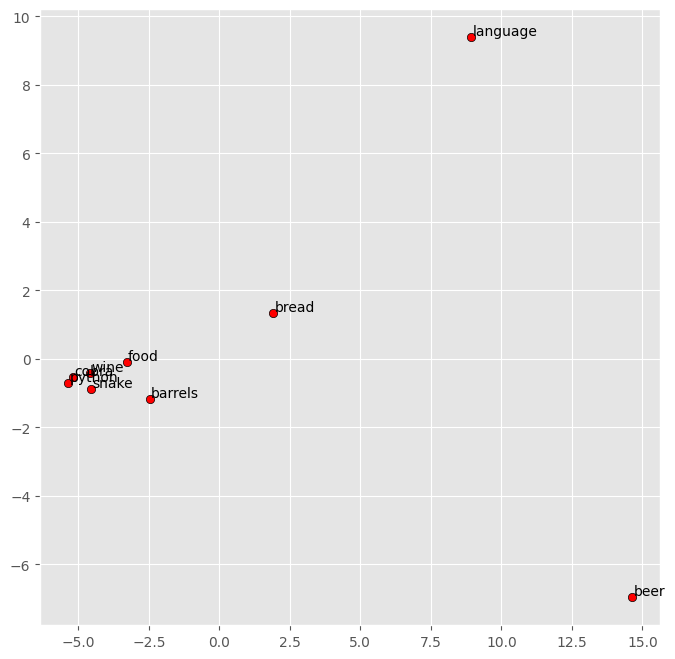

In [17]:
word_vectors, words = cooccurrence_vectors(word_list, news_word_ids, M)
visualize_vectors(words, word_vectors)

Word not found
Word not found
Word not found
Word not found
Word not found
Word not found
python [ 2.47535285 10.44536127]
snake [-7.18040328 -2.21334613]
language [-6.42301424 -0.84534923]
cobra [-6.79708023 -1.46548664]
food [-6.79281073 -1.56018119]
bread [30.9981216  -2.71910559]
wine [0.02951213 0.97645661]
beer [-6.3096781  -2.61834909]


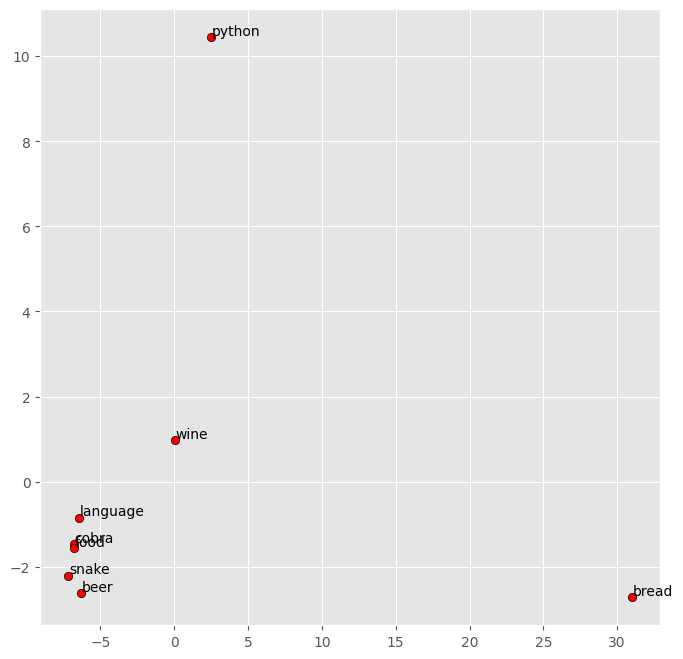

In [20]:
word_vectors, wordsw = cooccurrence_vectors(word_list, hobbies_word_ids, M_hobbies)
visualize_vectors(words, word_vectors)

# 3. Zipf's Law

First define two functions, one to tokenize text from a .txt file and another to extract the vocabulary and compute the number of occurrences of each word.

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/lilf4p/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def tokenize_from_txt(file_name):
    from nltk import word_tokenize
    file = open(file_name).read()
    words = word_tokenize(file)
    #clean up words 
    words = [word.lower() for word in words if word.isalpha()]
    return words

#print(tokenize_from_txt('./brown.txt'))

def count_words(words):
    vocab = dict()
    for word in words:
        if word in vocab: vocab[word]+=1
        else: vocab[word] = 1
    return vocab

print(count_words(tokenize_from_txt('./brown.txt')))

{'the': 1, 'fulton': 1, 'county': 1, 'grand': 1, 'jury': 1, 'said': 1, 'friday': 1, 'an': 1, 'investigation': 1, 'of': 1, 'recent': 1, 'primary': 1, 'election': 1, 'produced': 1, 'no': 1, 'evidence': 1, 'that': 1, 'any': 1, 'irregularities': 1, 'took': 1, 'place': 1, 'further': 1, 'in': 1, 'presentments': 1, 'city': 1, 'executive': 1, 'committee': 1, 'which': 1, 'had': 1, 'charge': 1, 'deserves': 1, 'praise': 1, 'and': 1, 'thanks': 1, 'atlanta': 1, 'for': 1, 'manner': 1, 'was': 1, 'conducted': 1, 'term': 1, 'been': 1, 'charged': 1, 'by': 1, 'superior': 1, 'court': 1, 'judge': 1, 'durwood': 1, 'pye': 1, 'to': 1, 'investigate': 1, 'reports': 1, 'possible': 1, 'won': 1, 'ivan': 1, 'allen': 1, 'only': 1, 'a': 1, 'relative': 1, 'handful': 1, 'such': 1, 'received': 1, 'considering': 1, 'widespread': 1, 'interest': 1, 'number': 1, 'voters': 1, 'size': 1, 'this': 1, 'it': 1, 'did': 1, 'find': 1, 'many': 1, 'registration': 1, 'laws': 1, 'are': 1, 'outmoded': 1, 'or': 1, 'inadequate': 1, 'often'

Extract the vocabulary and the number of occurrences of each word in it and plot the rank. Then fit the power law distribution to the data to extract the exponent alpha of the power law distribution and use it to estimate the exponent beta of the Zipf's law that approsimate the data.
Zipf's law:

$X[r] = C*r^{-\beta}$

where r is the rank and C a constant. The estimation of C should be equal to the number of occurrences in of the most frequent word but it's easy to see that a bigger value is needed to better fit the Zipf's law.

Regardless of the constant C the plot shows that the rank distribution is well approximated by the Zip's law.

You may want to use the package powerlaw to fit the \alpha to the data, from which to compute:
$$\beta = 1/(\alpha - 1)$$

See: https://github.com/jeffalstott/powerlaw.

{'the': 34565, 'and': 22154, 'to': 16705, 'of': 14989, 'a': 10499, 'he': 9941, 'in': 8922, 'that': 8078, 'his': 7965, 'was': 7327, 'with': 5692, 'it': 5513, 'had': 5353, 'not': 4827, 'her': 4676, 'him': 4541, 'at': 4535, 'i': 4480, 's': 4392, 'but': 4015, 'on': 3995, 'as': 3984, 'you': 3795, 'for': 3519, 'she': 3467, 'is': 3320, 'said': 2834, 'all': 2761, 'from': 2700, 'be': 2449, 'were': 2408, 'by': 2400, 'what': 2382, 'they': 2241, 'who': 2133, 'one': 2103, 'this': 2098, 'which': 2017, 'have': 1975, 'pierre': 1949, 'prince': 1919, 'so': 1840, 'an': 1622, 'or': 1591, 'up': 1545, 'there': 1526, 'them': 1490, 'when': 1486, 'did': 1478, 'been': 1475, 'their': 1437, 'no': 1399, 'would': 1360, 'if': 1301, 'now': 1294, 'only': 1292, 'are': 1276, 'my': 1222, 'me': 1219, 'out': 1218, 'natásha': 1205, 'man': 1156, 't': 1148, 'andrew': 1136, 'could': 1111, 'will': 1060, 'we': 1056, 'more': 1053, 'do': 1042, 'about': 1014, 'himself': 1008, 'into': 1004, 'how': 1002, 'then': 932, 'princess': 914,

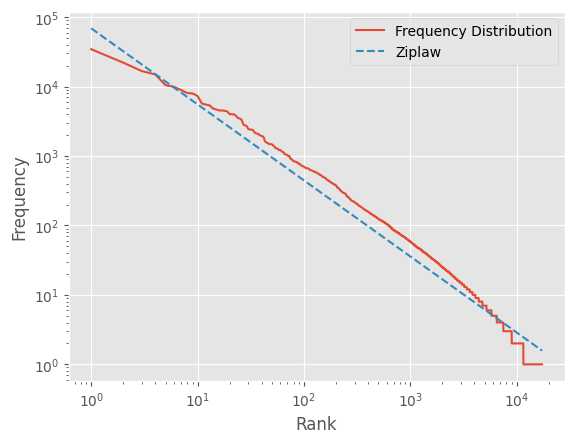

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

file_name = './war_and_peace.txt'

# extracting rank distribution of the word
words = tokenize_from_txt(file_name)
freq = count_words(words)
# rank is the order of the words by their frequency 
freq_rank = dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))
# rank is x and freq is y
y = list(freq_rank.values())
x = list(range(1,len(freq_rank)+1))
print(freq_rank)

# fitting of the power law distribution and estimation of the exponent of the Zip's law
import powerlaw
fit = powerlaw.Fit(y)
alpha = fit.power_law.alpha # alpha from powerlaw fitting
print("alpha: "+str(alpha))
#estimate beta from alpha 
beta = 1/(alpha-1)
print("beta: "+str(beta))

# plot the Zipf's law and the rank distribution on a log-log scale
plt.style.use('ggplot')
plt.figure()
plt.loglog()
plt.plot(x,y,label="Frequency Distribution")
#fit.power_law.plot_pdf()
ziplaw = [2*y[0] * (r ** (-beta)) for r in x] #estimation of ziplaw as X[r] = C * r ^ (-beta) with C = max occurencies 
print (ziplaw)
plt.plot(x,ziplaw,label="Ziplaw",linestyle="--")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()

# 4. Naïve Bayes Classifier
We will use the Movie Review dataset from https://www.kaggle.com/pankrzysiu/keras-imdb
It contains 50,000 highly polarized reviews, preprocessed, tokenized, indexed and stored into
numpy arrays.

In [1]:
num_words = 10000
MAX_NUM_WORDS = 10000
import tensorflow as tf
from tensorflow.keras.datasets import imdb

Load the training and test set:

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_NUM_WORDS,
                                                     index_from=1)

17464789/17464789 [==============================] - 2s 0us/step


Each document is represented as a list of word IDs, while the output is {0,1} (negative or positive review)

In [3]:
x_train[1], y_train[1]

([1,
  192,
  1151,
  192,
  8253,
  76,
  226,
  3,
  4,
  1461,
  4367,
  5010,
  132,
  24,
  2,
  713,
  6,
  116,
  1632,
  12,
  392,
  18,
  11,
  117,
  952,
  187,
  100,
  3,
  205,
  108,
  3101,
  19,
  12,
  67,
  186,
  6,
  28,
  21,
  5,
  2,
  247,
  124,
  91,
  2,
  112,
  7,
  2298,
  1521,
  3,
  645,
  2,
  114,
  7,
  33,
  8161,
  2,
  227,
  7,
  338,
  1320,
  2,
  116,
  7,
  2,
  128,
  4899,
  17,
  2,
  1000,
  3,
  87,
  27,
  950,
  44,
  35,
  2,
  453,
  7,
  43,
  41,
  36,
  1541,
  1903,
  396,
  2,
  1647,
  24,
  6851,
  3,
  161,
  9,
  3213,
  2,
  2,
  1151,
  7,
  192,
  773,
  5,
  8253,
  2,
  347,
  2635,
  146,
  603,
  2,
  8001,
  13,
  121,
  123,
  66,
  2,
  6851,
  13,
  347,
  163,
  4360,
  96,
  3,
  2,
  226,
  7,
  41,
  2,
  1155,
  13,
  297,
  118,
  3,
  118,
  172,
  9,
  218,
  173,
  134,
  48,
  7,
  4371,
  226,
  8253,
  3,
  2,
  654,
  243,
  2348,
  3,
  2,
  9835,
  129,
  150,
  489,
  16,
  2,
  30,
  7462,
  121

## 4.1 Classifier

The classifier should be implemted as a class with two methods: `train()` and `predict()`.

In [ ]:
import numpy as np
from collections import defaultdict

class NBayesClassifier():
    
    def train(self, x_train, y_train):
        """
        :param x_train: an array of list of word IDs
        :param y_train: {0,1} category for the correspoding document
        """
        # compute priors for each category
        self.P_C = #...
        # compute the conditional probabilities for each word/category pair
        self.logprob = # ...
        # turn counts into logprob

    def predict(self, x_test):
        """
        :param x_test: an array of list of word IDs
        :return: the predicted class for each document in :param x_test:.
        """
        # ...
        return y_pred

In [ ]:
nb_classifier = NBayesClassifier()
nb_classifier.train(x_train, y_train)

## 4.2 Evaluation

In [ ]:
def evaluate(y_test, y_pred):
    # compute tp, fp, tn, fn
    accuracy = # ...
    precision = # ...
    recall = # ...
    F1 = # ...
    print('Accuracy: %.2f %%, Precision:: %2.f %%, Recall: %2.f %%, F1: %2.f %%' % (accuracy, precision, recall, F1)

In [ ]:
y_pred = nb_classifier.predict(x_test)
evaluate(y_test, y_pred)

Compare with an official metrics:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))